HW3

In [ ]:
#Q1 Remove duplicate values in a dataset 

In [53]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [54]:
#if a numpy array

In [55]:
a = np.array([1,2,3,3,4,5])
print(a)

[1 2 3 3 4 5]


In [56]:
a_dedupe = np.unique(a)
print(a_dedupe)

[1 2 3 4 5]


In [57]:
#if a dataframe

In [58]:
b = pd.DataFrame([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])

In [59]:
b_dedupe = b.drop_duplicates()
b_dedupe

,0,1,2,3,4
0,1,2,3,4,5
2,1,2,3,4,6


In [60]:
#Q2 determine overall acceptance rate of requests?

In [61]:
friend_request = pd.DataFrame(
    {"requester_id":[1001,1002,1003],
     "time":["2017-07-01","2017-07-02","2017-07-03"],
     "receiver_id":[3001,3002,3003]}
)

In [62]:
request_accepted = pd.DataFrame(
    {"requester_id":[1001,1003],
     "time":["2017-07-01","2017-07-04"],
     "acceptor_id":[3001,3003]}
)

In [63]:
print(friend_request)
print(request_accepted)

   receiver_id  requester_id        time
0         3001          1001  2017-07-01
1         3002          1002  2017-07-02
2         3003          1003  2017-07-03
   acceptor_id  requester_id        time
0         3001          1001  2017-07-01
1         3003          1003  2017-07-04


In [64]:
a = pd.merge(friend_request,request_accepted,how="left",left_on=["requester_id", "receiver_id"], \
             right_on=["requester_id", "acceptor_id"])
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0)

0.6666666666666666

In [ ]:
# in SQL formet

In [ ]:
#select
#sum(if(t2.acceptor_id is null, 0, 1))/sum(1) as acceptance_rate,
#avg(time_diff(t2.time, t1.time)) as time_diff,
#from friend_request t1,
#left join request_accepted t2
#on t1.requester_id=t2.requeter_id
#and T1.receiver_id=T2.acceptor_id;

In [ ]:
#Q3 identify the issuer of the credit card number

In [65]:
def issuer_detector(cc):
# Amex
    if len(cc) == 15 and (cc[0:2]=='34' or cc[0:2]=='37'):
        return "AMEX"
    # Diners Club
    if len(cc)==14 and cc[0:2]=='36':
        return "DINERS CLUB"
    # Visa
    if len(cc) == 16 and cc[0:1]=='4':
        if cc[0:4] == "4026" \
            or cc[0:4] =="4405" \
            or cc[0:4] =="4844" \
            or cc[0:4] =="4913" \
            or cc[0:6] =="417500":
            return "VISAELECTRON"
        else:
            return "VISA"
    else:
        return "NA"

In [66]:
my_cc = ['4175004175004172',
         '4917491749174917',
         '346416800707698',
         '376416800707698',
         '37641680070769832112',
         '36641680070769',
         '54545641680070769']
       
        
for cc in my_cc:
    print(cc + " " + issuer_detector(cc))

4175004175004172 VISAELECTRON
4917491749174917 VISA
346416800707698 AMEX
376416800707698 AMEX
37641680070769832112 NA
36641680070769 DINERS CLUB
54545641680070769 NA


In [67]:
#Q4 PrintCumulativeTimeSeries()

In [68]:
file_location = "/Users/vivianli/Desktop/data-project2/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [69]:
# deal with date format
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.date.head()
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [70]:
def GetCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

In [71]:
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()

In [72]:
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date

    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)

Cumulative revenue impact: -4.465808189454918%


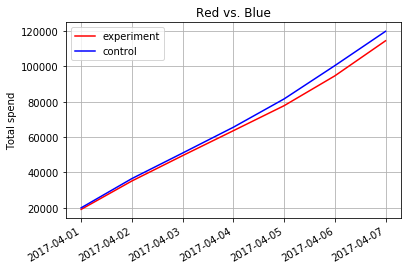

In [73]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US")